In [1]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import csv
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.lines import Line2D

In [6]:
result = pd.read_csv("../../../Downloads/result - result.csv")

In [8]:
#concat string from model and config into the new column setting
result["setting"] = result["Model"] + " " + result["Config"]
color_book = {"LSTM-CRF":"blue","FLERT":"yellow","Transformer":"red","GPT":"green","RNN":"purple"}
result["color"] = result["Model"].apply(lambda x: color_book[x])

(0.575547, -4.23829371819334, 'LSTM-CRF 19')
(0.776715, -3.3314961470436177, 'LSTM-CRF 50')
(0.816195, -2.7132616077231733, 'LSTM-CRF 100')
(0.785567, -4.665403457891894, 'FLERT 18')
(0.823617, -3.7096155804087596, 'FLERT 50')
(0.847255, -3.027685401330592, 'FLERT 100')
(0.547466, -7.080275205087156, 'RNN 18')
(0.504366, -5.782578543706668, 'RNN 50')
(0.606951, -5.058098857589601, 'RNN 100')
(0.3282, -7.8243092454994905, 'Transformer 40')
(0.3366, -7.575887713476417, 'Transformer 50')
(0.3013, -6.9440451424743035, 'Transformer 100')
(0.6697, 2.5232936821927043, 'GPT 3.5')
(0.5679, 5.064289798631748, 'GPT 4.5')
(0.6703, 3.621905970860814, 'GPT 3.5-finetuned')


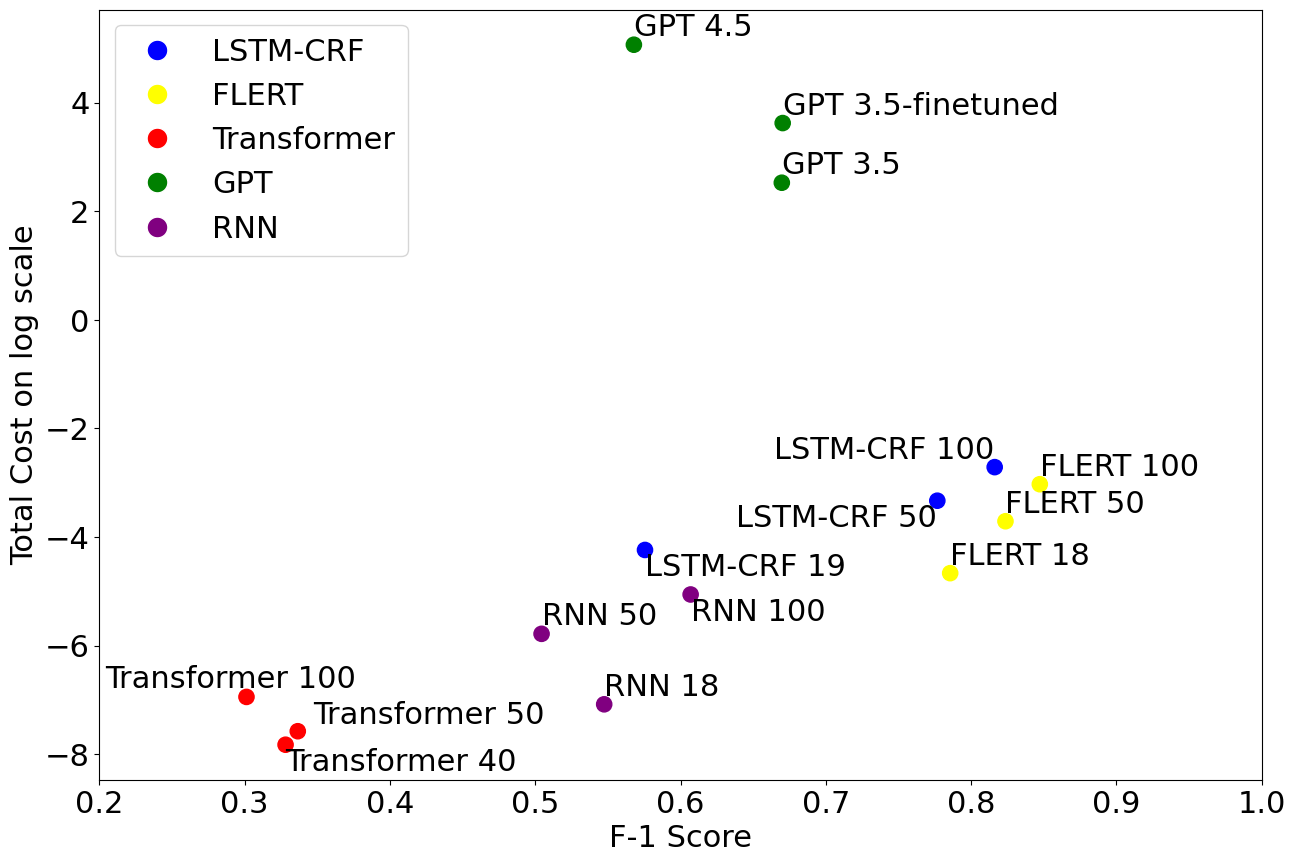

In [21]:

fig,ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 22})
p1 = plt.scatter(x=result["F1"], y=np.log(result["Corrected Total Cost"]), c=result["color"], s=120)
texts = []
for i,txt in enumerate(result["setting"]):
    print((result["F1"][i], np.log(result["Corrected Total Cost"][i]),txt))
    texts.append(plt.text(result["F1"][i], np.log(result["Corrected Total Cost"][i]),txt))
legend_elements = [Line2D([0], [0], marker='o', color='w', label=j,
                          markerfacecolor=color_book[j], markersize=15) for j in color_book.keys()]
ax.legend(handles=legend_elements, loc='upper left')
plt.xlim(0.2,1)
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.xlabel("F-1 Score",fontsize=22)
plt.ylabel("Total Cost on log scale",fontsize=22)
#plt.tight_layout()
plt.savefig("f1vsTotalCost.png",dpi=300)